# Toy Hamiltonian

This example studies a simple Hamiltonian and is to be used as initial test case.

## Settings

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
tfe = tf.contrib.eager
import sys
sys.path.append("../")

from IPython import display

In [2]:
from hamiltonians import toy_hamiltonian
from utils import BaseDistributionNormal
from utils import generate_and_save_images

In [3]:
sess = tf.InteractiveSession()

In [4]:
tf.set_random_seed(0)

In [5]:
# Suppress the warning till they fix this:
# lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:75: 
# DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
import warnings
warnings.filterwarnings("ignore")

In [6]:
DTYPE=tf.float32
NP_DTYPE=np.float32
settings = {
    'hamiltonian': toy_hamiltonian,  
    'd': 1,               # space dimension
    'num_particles': 1,   # number of particles
    'batch_size': 256,    # Mini batch size 
    'stack_size': 1,      # Size of the stack of bijectors
    'train_iters': int(1e5)}   # Number of training iterations

## Base distribution: Gaussian

In [7]:
base_dist = BaseDistributionNormal(settings)

## Model: Additive coupling / symplectic linear stack

In [14]:
from models import SymplecticAdditiveCoupling, MLP, LinearSymplectic, Chain

In [9]:
bijectors = []
for _ in range(settings['stack_size']):
    bijectors.extend([SymplecticAdditiveCoupling( MLP() ),
                      LinearSymplectic()])
model = Chain(bijectors)

## Define the loss
$\text{KL}( H_{\text{osc}} | H_{\text{toy}} ) \rightarrow \frac{1}{N}\sum_{i=1}^N H_{\text{toy}}( \text{model}(z_i) )$

In [10]:
with tf.name_scope("loss"):
    z_samples = base_dist.sample(settings['batch_size'])    
    loss = tf.reduce_mean( settings['hamiltonian']( model(z_samples) ) )

## Train

In [11]:
train_op = tf.train.AdamOptimizer(1e-3).minimize(loss)

<Figure size 432x288 with 0 Axes>

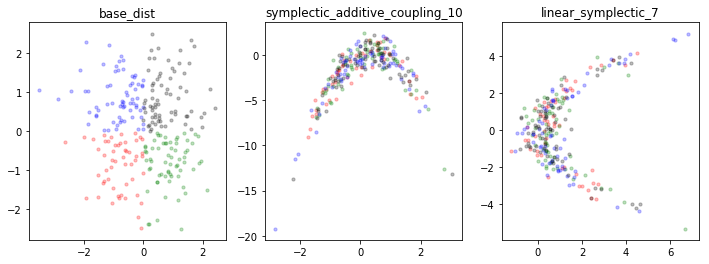

Iteration: 99000, loss = 0.2630228102207184


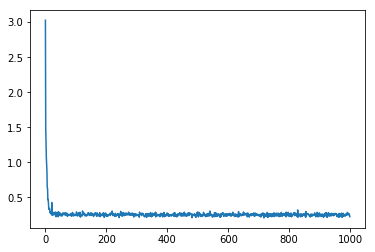

In [51]:
sess.run(tf.global_variables_initializer())

np_losses = []
for i in range(int(settings['train_iters'])):
    _, np_loss = sess.run([train_op, loss])
    if i % 100 == 0:
        np_losses.append(np_loss)
    if i % 1000 == 0:
        display.clear_output(wait=True)
        generate_and_save_images(model,
                                 i + 1,
                                 z_samples,
                                 sess)
        print("Iteration: {}, loss = {}".format(i, np_loss))

start = 0
plt.plot(np_losses[start:])

## Model: HamiltonianFlow 

In [8]:
from models import HamiltonianFlow, MLPHamiltonian

In [14]:
model = HamiltonianFlow( MLPHamiltonian(), initial_t=0., final_t=1., num_steps=100 )

## Define the loss
$\text{KL}( H_{\text{osc}} | H_{\text{toy}} ) \rightarrow \frac{1}{N}\sum_{i=1}^N H_{\text{toy}}( \text{model}(z_i) )$

In [15]:
with tf.name_scope("loss"):
    z_samples = base_dist.sample(settings['batch_size'])  
    loss = tf.reduce_mean( settings['hamiltonian']( model(z_samples) ) )

## Train

In [16]:
train_op = tf.train.AdamOptimizer(1e-3).minimize(loss)

In [17]:
sess.run(tf.global_variables_initializer())

np_losses = []
for i in range(int(settings['train_iters'])):
    _, np_loss = sess.run([train_op, loss])
    if i % 100 == 0:
        np_losses.append(np_loss)
    if i % 1 == 0:
#         display.clear_output(wait=True)
#         generate_and_save_images(model,
#                                  i + 1,
#                                  z_samples,
#                                  sess)
        print("Iteration: {}, loss = {}".format(i, np_loss))

start = 0
plt.plot(np_losses[start:])

Iteration: 0, loss = 0.6835269331932068
Iteration: 1, loss = 0.6850025653839111
Iteration: 2, loss = 0.5458074808120728
Iteration: 3, loss = 0.648285984992981
Iteration: 4, loss = 0.5670020580291748
Iteration: 5, loss = 0.5387468934059143
Iteration: 6, loss = 0.6811192035675049
Iteration: 7, loss = 0.6897270679473877
Iteration: 8, loss = 0.5756559371948242
Iteration: 9, loss = 0.5685076713562012
Iteration: 10, loss = 0.6173681020736694
Iteration: 11, loss = 0.6806136965751648
Iteration: 12, loss = 0.5837873816490173
Iteration: 13, loss = 0.6003379821777344
Iteration: 14, loss = 0.6872227191925049
Iteration: 15, loss = 0.5506550073623657
Iteration: 16, loss = 0.5577878952026367
Iteration: 17, loss = 0.5204416513442993
Iteration: 18, loss = 0.6140435934066772
Iteration: 19, loss = 0.5265182256698608
Iteration: 20, loss = 0.5244050621986389
Iteration: 21, loss = 0.5621501803398132
Iteration: 22, loss = 0.5240627527236938
Iteration: 23, loss = 0.5923776626586914
Iteration: 24, loss = 0.521

Iteration: 197, loss = 0.4417545795440674
Iteration: 198, loss = 0.42916157841682434
Iteration: 199, loss = 0.43885064125061035
Iteration: 200, loss = 0.40354713797569275
Iteration: 201, loss = 0.3606860637664795
Iteration: 202, loss = 0.45641404390335083
Iteration: 203, loss = 0.41390830278396606
Iteration: 204, loss = 0.4514060616493225
Iteration: 205, loss = 0.39927107095718384
Iteration: 206, loss = 0.3917813003063202
Iteration: 207, loss = 0.4085361659526825
Iteration: 208, loss = 0.4370047152042389
Iteration: 209, loss = 0.40296468138694763
Iteration: 210, loss = 0.3883932828903198
Iteration: 211, loss = 0.5263636708259583
Iteration: 212, loss = 0.4079638123512268
Iteration: 213, loss = 0.36717379093170166
Iteration: 214, loss = 0.37420815229415894
Iteration: 215, loss = 0.42599618434906006
Iteration: 216, loss = 0.48168355226516724
Iteration: 217, loss = 0.34851402044296265
Iteration: 218, loss = 0.39555981755256653
Iteration: 219, loss = 0.3489423096179962
Iteration: 220, loss 

Iteration: 391, loss = 0.32627496123313904
Iteration: 392, loss = 0.3192908763885498
Iteration: 393, loss = 0.2564556896686554
Iteration: 394, loss = 0.2819654941558838
Iteration: 395, loss = 0.2697732746601105
Iteration: 396, loss = 0.26029887795448303
Iteration: 397, loss = 0.3045993447303772
Iteration: 398, loss = 0.2636970281600952
Iteration: 399, loss = 0.26798567175865173
Iteration: 400, loss = 0.30830225348472595
Iteration: 401, loss = 0.2547699213027954
Iteration: 402, loss = 0.31464216113090515
Iteration: 403, loss = 0.2722685933113098
Iteration: 404, loss = 0.32137346267700195
Iteration: 405, loss = 0.2979434132575989
Iteration: 406, loss = 0.28011685609817505
Iteration: 407, loss = 0.30076131224632263
Iteration: 408, loss = 0.3088712990283966
Iteration: 409, loss = 0.27300888299942017
Iteration: 410, loss = 0.2696235179901123
Iteration: 411, loss = 0.2908502519130707
Iteration: 412, loss = 0.2970479428768158
Iteration: 413, loss = 0.27611517906188965
Iteration: 414, loss = 0

Iteration: 585, loss = 0.23463743925094604
Iteration: 586, loss = 0.25178807973861694
Iteration: 587, loss = 0.24970318377017975
Iteration: 588, loss = 0.26675277948379517
Iteration: 589, loss = 0.22947701811790466
Iteration: 590, loss = 0.2895852029323578
Iteration: 591, loss = 0.236989364027977
Iteration: 592, loss = 0.2452184557914734
Iteration: 593, loss = 0.25360599160194397
Iteration: 594, loss = 0.2632564902305603
Iteration: 595, loss = 0.240174800157547
Iteration: 596, loss = 0.2470124363899231
Iteration: 597, loss = 0.23470789194107056
Iteration: 598, loss = 0.26257821917533875
Iteration: 599, loss = 0.264509379863739
Iteration: 600, loss = 0.23840132355690002
Iteration: 601, loss = 0.24565550684928894
Iteration: 602, loss = 0.2857685685157776
Iteration: 603, loss = 0.2701641917228699
Iteration: 604, loss = 0.26410770416259766
Iteration: 605, loss = 0.24598754942417145
Iteration: 606, loss = 0.28220874071121216
Iteration: 607, loss = 0.26936396956443787
Iteration: 608, loss = 

Iteration: 778, loss = 0.24894574284553528
Iteration: 779, loss = 0.26872754096984863
Iteration: 780, loss = 0.2708408534526825
Iteration: 781, loss = 0.2467956840991974
Iteration: 782, loss = 0.2587648928165436
Iteration: 783, loss = 0.22915010154247284
Iteration: 784, loss = 0.26570889353752136
Iteration: 785, loss = 0.2737639546394348
Iteration: 786, loss = 0.2415315955877304
Iteration: 787, loss = 0.28854209184646606
Iteration: 788, loss = 0.2542691230773926
Iteration: 789, loss = 0.2577653229236603
Iteration: 790, loss = 0.2465948462486267
Iteration: 791, loss = 0.2838684916496277
Iteration: 792, loss = 0.26818716526031494
Iteration: 793, loss = 0.23995353281497955
Iteration: 794, loss = 0.27186504006385803
Iteration: 795, loss = 0.2557581067085266
Iteration: 796, loss = 0.23898017406463623
Iteration: 797, loss = 0.28745949268341064
Iteration: 798, loss = 0.2441653460264206
Iteration: 799, loss = 0.2668391168117523
Iteration: 800, loss = 0.2600027918815613
Iteration: 801, loss = 0

Iteration: 971, loss = 0.25761789083480835
Iteration: 972, loss = 0.254941463470459
Iteration: 973, loss = 0.25759074091911316
Iteration: 974, loss = 0.27625662088394165
Iteration: 975, loss = 0.27190572023391724
Iteration: 976, loss = 0.25871431827545166
Iteration: 977, loss = 0.24734649062156677
Iteration: 978, loss = 0.2666380703449249
Iteration: 979, loss = 0.268226683139801
Iteration: 980, loss = 0.2588147222995758
Iteration: 981, loss = 0.23398609459400177
Iteration: 982, loss = 0.2522500157356262
Iteration: 983, loss = 0.24426254630088806
Iteration: 984, loss = 0.26739567518234253
Iteration: 985, loss = 0.23995649814605713
Iteration: 986, loss = 0.24155713617801666
Iteration: 987, loss = 0.2500835359096527
Iteration: 988, loss = 0.26959967613220215
Iteration: 989, loss = 0.2773677110671997
Iteration: 990, loss = 0.29111164808273315
Iteration: 991, loss = 0.23905710875988007
Iteration: 992, loss = 0.2845316231250763
Iteration: 993, loss = 0.265230655670166
Iteration: 994, loss = 

Iteration: 1160, loss = 0.26461517810821533
Iteration: 1161, loss = 0.2661644220352173
Iteration: 1162, loss = 0.25598037242889404
Iteration: 1163, loss = 0.26551955938339233
Iteration: 1164, loss = 0.27010199427604675
Iteration: 1165, loss = 0.24818557500839233
Iteration: 1166, loss = 0.25818389654159546
Iteration: 1167, loss = 0.2231675386428833
Iteration: 1168, loss = 0.22452208399772644
Iteration: 1169, loss = 0.2629046142101288
Iteration: 1170, loss = 0.25560352206230164
Iteration: 1171, loss = 0.2763514816761017
Iteration: 1172, loss = 0.21859242022037506
Iteration: 1173, loss = 0.2650386691093445
Iteration: 1174, loss = 0.24348676204681396
Iteration: 1175, loss = 0.24220424890518188
Iteration: 1176, loss = 0.2641732394695282
Iteration: 1177, loss = 0.2549440264701843
Iteration: 1178, loss = 0.26846280694007874
Iteration: 1179, loss = 0.2682284116744995
Iteration: 1180, loss = 0.2200474888086319
Iteration: 1181, loss = 0.24490255117416382
Iteration: 1182, loss = 0.230625063180923

KeyboardInterrupt: 

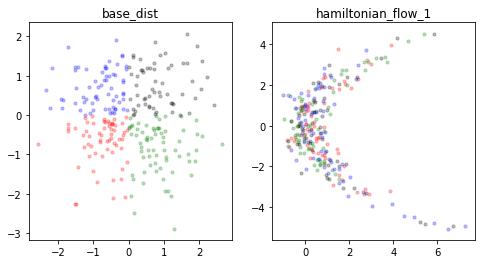

In [18]:
samples = [sess.run(z_samples)]
names = ["base_dist"]
samples.append(sess.run(model(z_samples)))
names.append(model.name)

f, arr = plt.subplots(1, len(samples), figsize=(4 * (len(samples)), 4))
X0 = np.reshape(samples[0], (samples[0].shape[0], 2))
for i in range(len(samples)):
    X1 = np.reshape(samples[i], (samples[0].shape[0], 2))
    idx = np.logical_and(X0[:, 0] < 0, X0[:, 1] < 0)
    arr[i].scatter(X1[idx, 0], X1[idx, 1], s=10, color='red', alpha=.25)
    idx = np.logical_and(X0[:, 0] > 0, X0[:, 1] < 0)
    arr[i].scatter(X1[idx, 0], X1[idx, 1], s=10, color='green', alpha=.25)
    idx = np.logical_and(X0[:, 0] < 0, X0[:, 1] > 0)
    arr[i].scatter(X1[idx, 0], X1[idx, 1], s=10, color='blue', alpha=.25)
    idx = np.logical_and(X0[:, 0] > 0, X0[:, 1] > 0)
    arr[i].scatter(X1[idx, 0], X1[idx, 1], s=10, color='black', alpha=.25)
    arr[i].set_title(names[i])


## Flow of the system

Position and momentat at time $t$, given initial condition $x_0$:

$$\varphi_t(x_0) = T \circ (\sqrt{2 E} \sin(t + \alpha), \sqrt{2 E} \cos(t + \alpha) ) \, .$$

with

$$  \tan(\alpha) = \frac{q_0}{p_0} \, ,\quad \sqrt{2E} = \frac{q_0}{\sin(\alpha)}\, ,\quad (q_0,p_0) = T^{-1} \circ x_0 \,.$$

# TODO

In [ ]:
# from utils import system_flow
    
# # Initial conditions
# Q_0 = 1.
# P_0 = 0
# ts = np.arange(0,10,.1, dtype=NP_DTYPE)
# points = system_flow(Q_0, P_0, model, ts).numpy()
# qs = points[:,0,0]
# ps = points[:,1,0]
# plt.plot(qs,ps)

Flow is area-preserving. Here show flow of the circle:

In [ ]:
# delta = np.pi/20
# theta = np.arange(0,2*np.pi+delta, delta, dtype=NP_DTYPE)
# circle = np.stack([np.cos(theta), np.sin(theta)], axis=0)
# plt.plot(circle[0], circle[1])

# ts = np.array([1, 5, 10], dtype=NP_DTYPE)
# qs = []
# ps = []
# for i in range(circle.shape[1]):
#     Q = circle[0][i]
#     P = circle[1][i]
#     points = system_flow(Q, P, model, ts).numpy()
#     qs.append(points[:,0,0])
#     ps.append(points[:,1,0])
# plt.plot(qs,ps)

### Compare with numerical solution of Hamilton's equations

In [ ]:
def f(q,p):
    """- d H / d q = - q + \tfrac{1}{4} p ^2"""
    return -q + 1/4 * p**2

def g(q,p):
    """d H / d p = - \tfrac{1}{2} q p + \tfrac{1}{16} p(1 + 2 p^2)"""
    return -1/2 * p * q + 1/16 * p * (1 + 2 * p**2)

In [ ]:
from utils import euler

N = 10000 # Number of time steps
h = 0.01 # size of time step
qsol, psol = euler(Q_0, P_0, f, g, N, h)
# Plot against qs ps from bijector solution
plt.plot(qsol, psol)
plt.plot(qs, ps)

This is quantitatively in agreement with the behavior obtained from the normalizing flow approach. 

TODO: Small discrepancies go away if we use a better integrator like stormer verlet than euler or train for more time?